# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
#Type your code here

# Untuk manipulasi data
import pandas as pd
import numpy as np

# Untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# Untuk model Random Forest
from sklearn.ensemble import RandomForestClassifier

# Untuk model SVM
from sklearn.svm import SVC

#Untuk model KNN
from sklearn.neighbors import KNeighborsClassifier

# Untuk evaluasi model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Untuk tuning model
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
#Type your code here

df = pd.read_csv('/content/dataset_fix.csv')
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster_Fix
0,40.900749,0.818182,4.568506,0.000000,4.568506,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,5.312231e+00,4.945277,0.000000,12,0
1,3202.467416,0.909091,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,8.319725e+00,6.978531,0.222222,12,0
2,2495.148862,1.000000,6.651791,6.651791,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,6.434654e+00,6.442994,0.000000,12,0
3,1666.670542,0.636364,7.313220,7.313220,0.000000,5.331694,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,8.881784e-16,5.747301,0.000000,12,0
4,817.714335,1.000000,2.833213,2.833213,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,6.521114e+00,5.504483,0.000000,12,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   float64
 11  PURCHASES_TRX                     8950 non-null   float64
 12  CREDIT

### Preporecessing Data

In [4]:
df_use = df.copy()

features_to_scale = df_use.drop(columns=['Cluster_Fix', 'TENURE']).columns

scaler = RobustScaler()
df_use[features_to_scale] = scaler.fit_transform(df_use[features_to_scale])

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

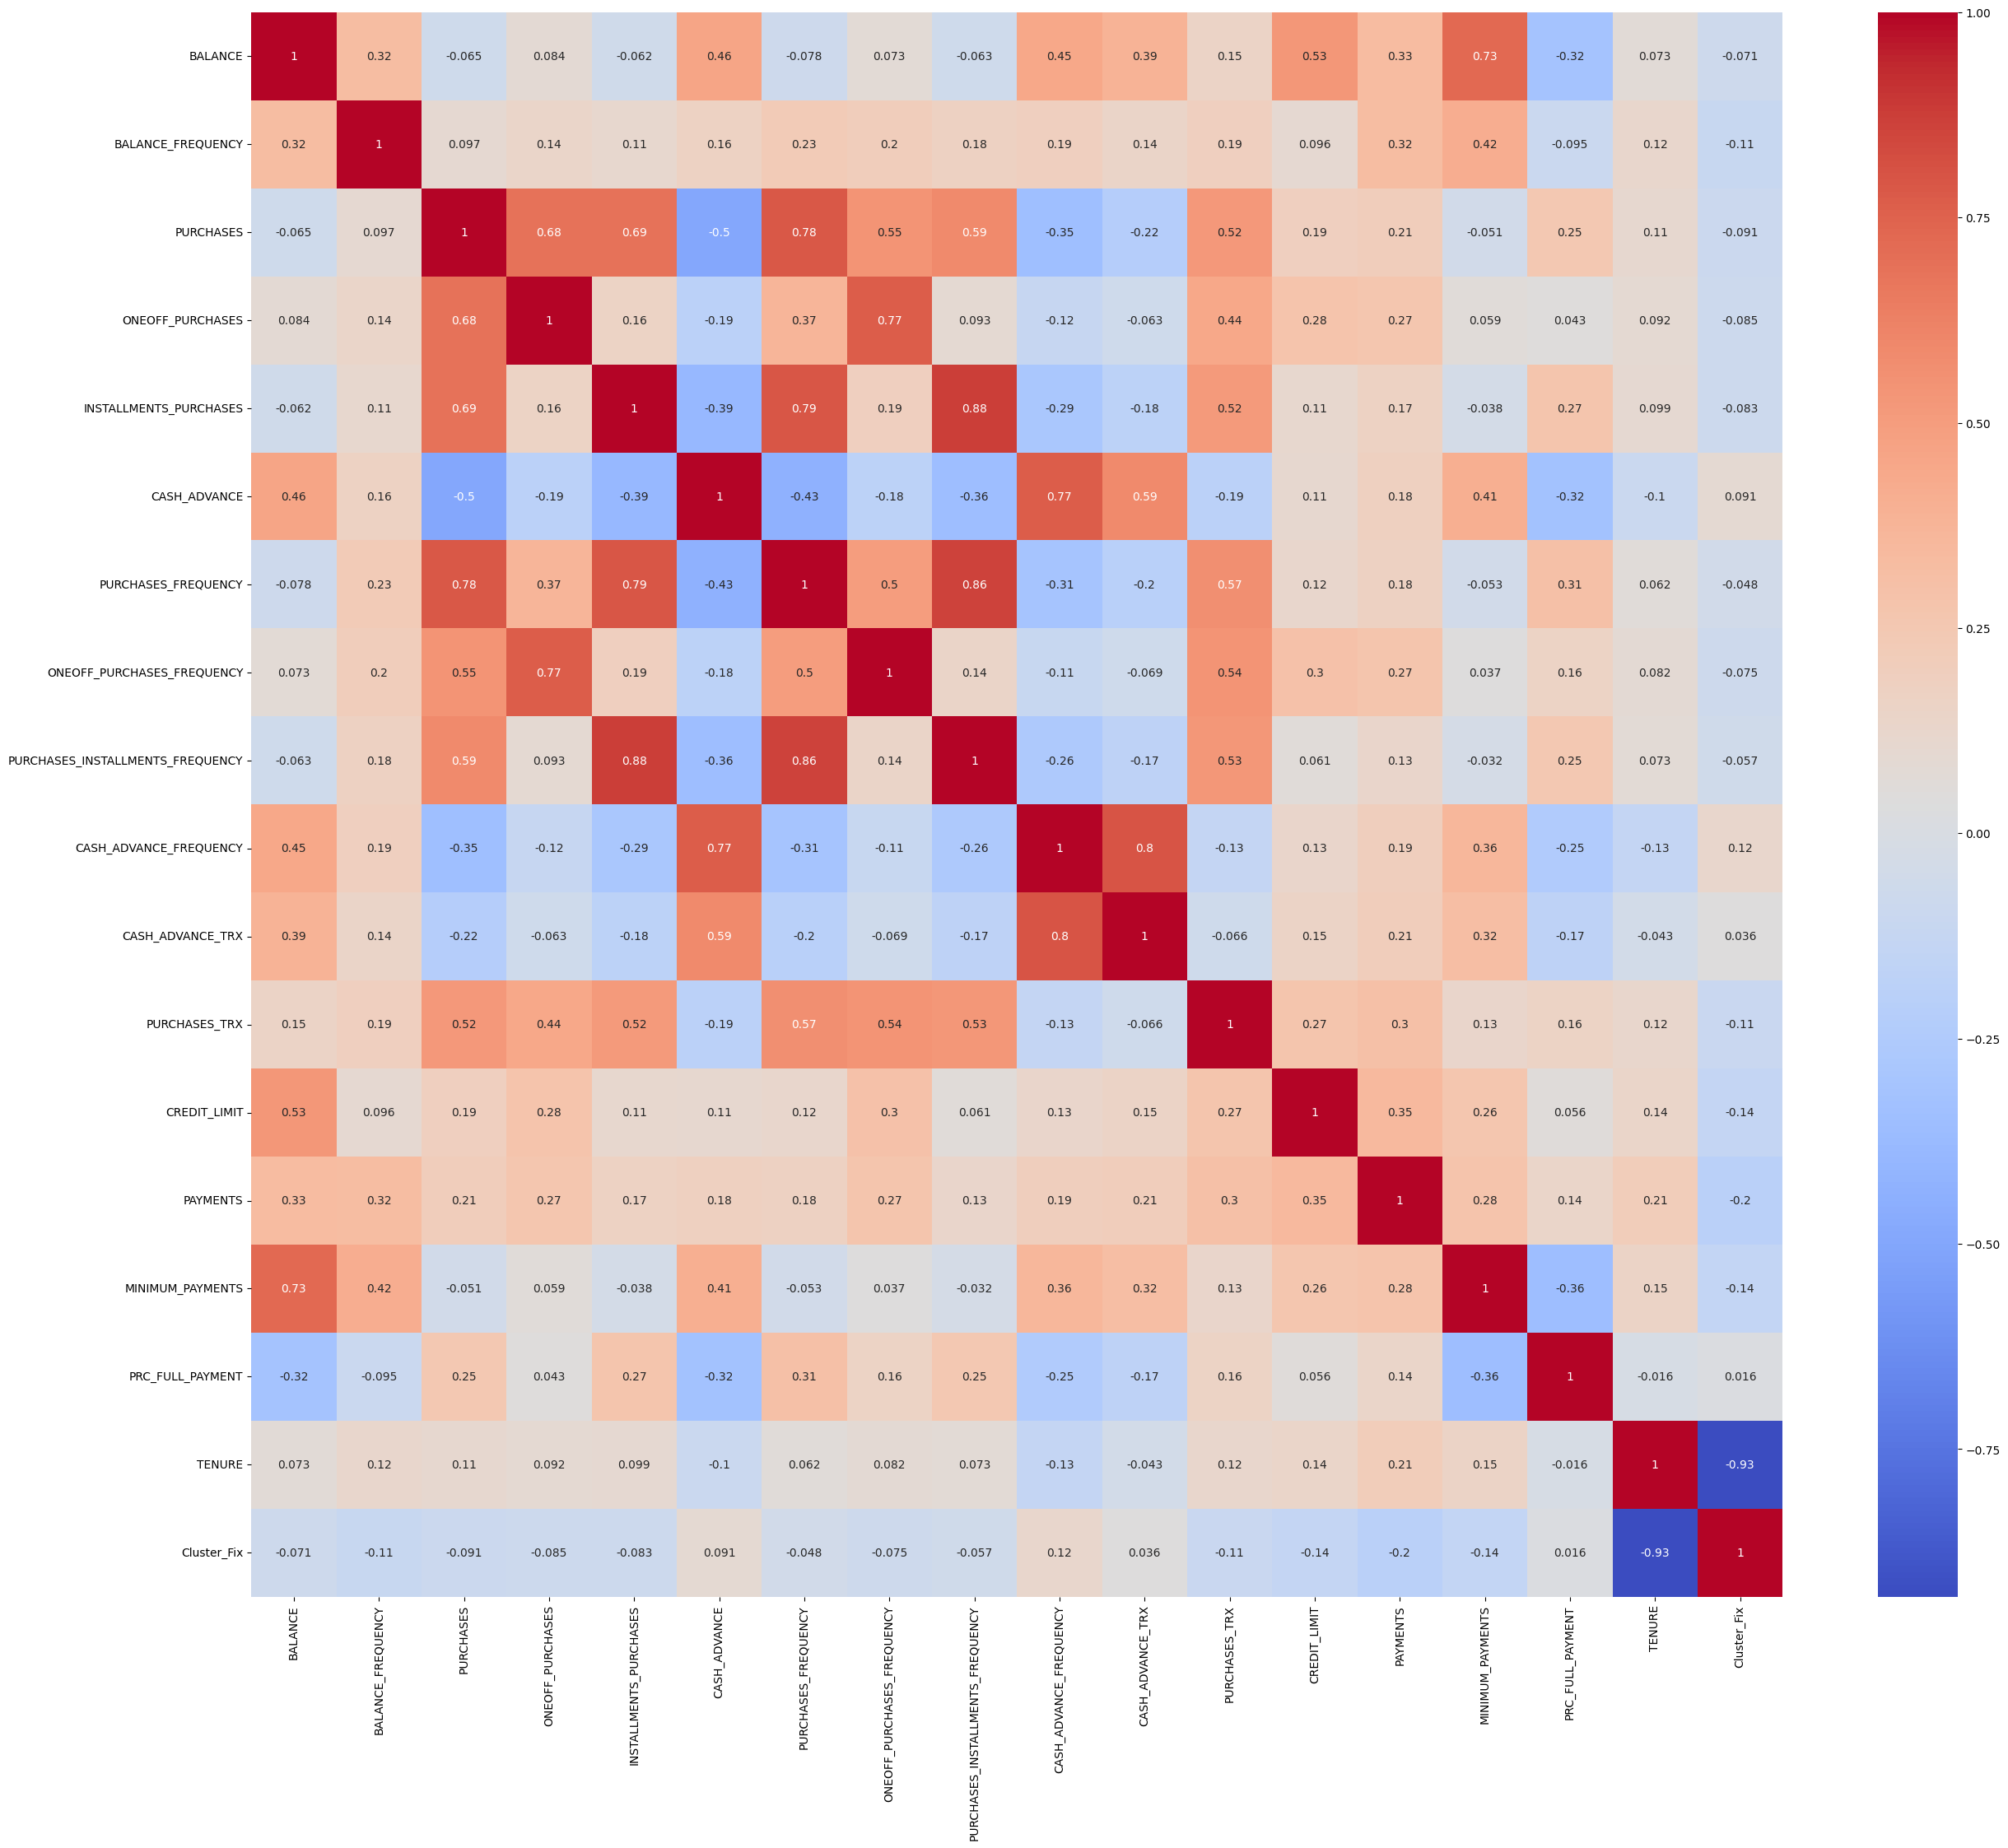

In [5]:
plt.figure(figsize=(30, 25))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [6]:
#Type your code here
X = df_use.drop(columns=['Cluster_Fix'])
y = df_use['Cluster_Fix']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cek ukuran data setelah split
print(f"Training Data: {X_train.shape}, Testing Data: {X_test.shape}")

Training Data: (7160, 17), Testing Data: (1790, 17)


In [7]:
print("Train Target Distribution:\n", pd.Series(y_train).value_counts(normalize=True))
print("Test Target Distribution:\n", pd.Series(y_test).value_counts(normalize=True))

Train Target Distribution:
 Cluster_Fix
0    0.914665
1    0.085335
Name: proportion, dtype: float64
Test Target Distribution:
 Cluster_Fix
0    0.913966
1    0.086034
Name: proportion, dtype: float64


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [8]:
#Type your code here

# Inisialisasi model dengan parameter default
rf_model = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)

# Latih model dengan training data
rf_model.fit(X_train, y_train)

# Prediksi pada data training (untuk melihat performa awal)
y_train_pred = rf_model.predict(X_train)

# Evaluasi akurasi pada training set
print("Random Forest - All Features (Train Data)")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))

Random Forest - All Features (Train Data)
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6549
           1       1.00      1.00      1.00       611

    accuracy                           1.00      7160
   macro avg       1.00      1.00      1.00      7160
weighted avg       1.00      1.00      1.00      7160

[[6549    0]
 [   0  611]]


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [9]:
#Type your code here

# 1. Prediksi menggunakan data uji
y_test_pred = rf_model.predict(X_test)

# Evaluasi akurasi pada training set
print("Random Forest - All Features (Test Data)")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

Random Forest - All Features (Test Data)
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1636
           1       1.00      1.00      1.00       154

    accuracy                           1.00      1790
   macro avg       1.00      1.00      1.00      1790
weighted avg       1.00      1.00      1.00      1790

[[1636    0]
 [   0  154]]


Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

Setelah dilakukan training pertama menggunakan algoritma random forest ternyata model yang didapat overfitting, ini kemungkinan dikarenakan oleh beberapa kolom yang sangat berpengaruh pada klasifikasi. Selanjutnya mari kita bandingkan dengan dua motode yang berbeda, yaitu menghapus kolom yang sangat berpengaruh dan mengganti algoritmanya menjadi SVM.

### 4. 1. Ganti kolom yang digunakan

In [10]:
# 🔹 Data split: All features
X1 = df_use.drop('Cluster_Fix', axis=1)
y1 = df_use['Cluster_Fix']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42, stratify=y1)
print(f"Training Data: {X_train1.shape}, Testing Data: {X_test1.shape}")

# 🔁 Model list: KNN & SVM only
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(random_state=42)
}

# 🔁 Train & Evaluate
for name, model in models.items():
    print(f"\n🔹🔹🔹 {name} - Train 🔹🔹🔹")
    model.fit(X_train1, y_train1)
    y_pred_train = model.predict(X_train1)
    print(classification_report(y_train1, y_pred_train))
    print(confusion_matrix(y_train1, y_pred_train))

    print(f"\n🔹🔹🔹 {name} - Test 🔹🔹🔹")
    y_pred_test = model.predict(X_test1)
    print(classification_report(y_test1, y_pred_test))
    print(confusion_matrix(y_test1, y_pred_test))
    print("-" * 60)


Training Data: (7160, 17), Testing Data: (1790, 17)

🔹🔹🔹 KNN - Train 🔹🔹🔹
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6548
           1       0.99      0.97      0.98       612

    accuracy                           1.00      7160
   macro avg       1.00      0.99      0.99      7160
weighted avg       1.00      1.00      1.00      7160

[[6544    4]
 [  17  595]]

🔹🔹🔹 KNN - Test 🔹🔹🔹
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1637
           1       0.99      0.96      0.98       153

    accuracy                           1.00      1790
   macro avg       0.99      0.98      0.99      1790
weighted avg       1.00      1.00      1.00      1790

[[1636    1]
 [   6  147]]
------------------------------------------------------------

🔹🔹🔹 SVM - Train 🔹🔹🔹
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6548
        

Menggunakan dua atribut yang digunakan saat clustering

In [11]:
# 🔹 Data split 2 fitur: TENURE & CASH_ADVANCE
X2 = df_use[['TENURE', 'CASH_ADVANCE']]
y2 = df_use['Cluster_Fix']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42, stratify=y2)
print(f"Training Data: {X_train2.shape}, Testing Data: {X_test2.shape}")

# 🔁 Model list
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(random_state=42)
}

# 🔁 Train & Evaluate
for name, model in models.items():
    print(f"\n🔹🔹🔹 {name} - Train 🔹🔹🔹")
    model.fit(X_train2, y_train2)
    y_pred_train = model.predict(X_train2)
    print(classification_report(y_train2, y_pred_train))
    print(confusion_matrix(y_train2, y_pred_train))

    print(f"\n🔹🔹🔹 {name} - Test 🔹🔹🔹")
    y_pred_test = model.predict(X_test2)
    print(classification_report(y_test2, y_pred_test))
    print(confusion_matrix(y_test2, y_pred_test))
    print("-" * 60)


Training Data: (7160, 2), Testing Data: (1790, 2)

🔹🔹🔹 Random Forest - Train 🔹🔹🔹
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6548
           1       1.00      1.00      1.00       612

    accuracy                           1.00      7160
   macro avg       1.00      1.00      1.00      7160
weighted avg       1.00      1.00      1.00      7160

[[6548    0]
 [   0  612]]

🔹🔹🔹 Random Forest - Test 🔹🔹🔹
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1637
           1       1.00      1.00      1.00       153

    accuracy                           1.00      1790
   macro avg       1.00      1.00      1.00      1790
weighted avg       1.00      1.00      1.00      1790

[[1637    0]
 [   0  153]]
------------------------------------------------------------

🔹🔹🔹 KNN - Train 🔹🔹🔹
              precision    recall  f1-score   support

           0       1.00      1.00      1.00 

Menggunakan atribut TENURE yang mempunyai nilai -0.91 pada heatmap

In [12]:
# 🔹 Data split: TENURE only
X3 = df_use[['TENURE']]
y3 = df_use['Cluster_Fix']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42, stratify=y3)
print(f"Training Data: {X_train3.shape}, Testing Data: {X_test3.shape}")

# 🔁 Model list
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# 🔁 Train & Evaluate
for name, model in models.items():
    print(f"\n🔹🔹🔹 {name} - Train 🔹🔹🔹")
    model.fit(X_train3, y_train3)
    y_pred_train = model.predict(X_train3)
    print(classification_report(y_train3, y_pred_train))
    print(confusion_matrix(y_train3, y_pred_train))

    print(f"\n🔹🔹🔹 {name} - Test 🔹🔹🔹")
    y_pred_test = model.predict(X_test3)
    print(classification_report(y_test3, y_pred_test))
    print(confusion_matrix(y_test3, y_pred_test))
    print("-" * 60)


Training Data: (7160, 1), Testing Data: (1790, 1)

🔹🔹🔹 KNN - Train 🔹🔹🔹
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6548
           1       1.00      1.00      1.00       612

    accuracy                           1.00      7160
   macro avg       1.00      1.00      1.00      7160
weighted avg       1.00      1.00      1.00      7160

[[6548    0]
 [   0  612]]

🔹🔹🔹 KNN - Test 🔹🔹🔹
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1637
           1       1.00      1.00      1.00       153

    accuracy                           1.00      1790
   macro avg       1.00      1.00      1.00      1790
weighted avg       1.00      1.00      1.00      1790

[[1637    0]
 [   0  153]]
------------------------------------------------------------

🔹🔹🔹 Random Forest - Train 🔹🔹🔹
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6548


Menggunakan data paling netral

In [14]:
# 🔹 Data split: TENURE only
X4 = df_use[['PRC_FULL_PAYMENT']]
y4 = df_use['Cluster_Fix']

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2, random_state=42, stratify=y3)
print(f"Training Data: {X_train4.shape}, Testing Data: {X_test4.shape}")

# 🔁 Model list
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# 🔁 Train & Evaluate
for name, model in models.items():
    print(f"\n🔹🔹🔹 {name} - Train 🔹🔹🔹")
    model.fit(X_train4, y_train4)
    y_pred_train = model.predict(X_train4)
    print(classification_report(y_train4, y_pred_train))
    print(confusion_matrix(y_train4, y_pred_train))

    print(f"\n🔹🔹🔹 {name} - Test 🔹🔹🔹")
    y_pred_test = model.predict(X_test4)
    print(classification_report(y_test4, y_pred_test))
    print(confusion_matrix(y_test4, y_pred_test))
    print("-" * 60)


Training Data: (7160, 1), Testing Data: (1790, 1)

🔹🔹🔹 KNN - Train 🔹🔹🔹


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.91      1.00      0.96      6548
           1       0.00      0.00      0.00       612

    accuracy                           0.91      7160
   macro avg       0.46      0.50      0.48      7160
weighted avg       0.84      0.91      0.87      7160

[[6548    0]
 [ 612    0]]

🔹🔹🔹 KNN - Test 🔹🔹🔹


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.91      1.00      0.96      1637
           1       0.00      0.00      0.00       153

    accuracy                           0.91      1790
   macro avg       0.46      0.50      0.48      1790
weighted avg       0.84      0.91      0.87      1790

[[1637    0]
 [ 153    0]]
------------------------------------------------------------

🔹🔹🔹 Random Forest - Train 🔹🔹🔹


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

              precision    recall  f1-score   support

           0       0.91      1.00      0.96      6548
           1       0.00      0.00      0.00       612

    accuracy                           0.91      7160
   macro avg       0.46      0.50      0.48      7160
weighted avg       0.84      0.91      0.87      7160

[[6548    0]
 [ 612    0]]

🔹🔹🔹 Random Forest - Test 🔹🔹🔹
              precision    recall  f1-score   support

           0       0.91      1.00      0.96      1637
           1       0.00      0.00      0.00       153

    accuracy                           0.91      1790
   macro avg       0.46      0.50      0.48      1790
weighted avg       0.84      0.91      0.87      1790

[[1637    0]
 [ 153    0]]
------------------------------------------------------------

🔹🔹🔹 SVM - Train 🔹🔹🔹


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.91      1.00      0.96      6548
           1       0.00      0.00      0.00       612

    accuracy                           0.91      7160
   macro avg       0.46      0.50      0.48      7160
weighted avg       0.84      0.91      0.87      7160

[[6548    0]
 [ 612    0]]

🔹🔹🔹 SVM - Test 🔹🔹🔹
              precision    recall  f1-score   support

           0       0.91      1.00      0.96      1637
           1       0.00      0.00      0.00       153

    accuracy                           0.91      1790
   macro avg       0.46      0.50      0.48      1790
weighted avg       0.84      0.91      0.87      1790

[[1637    0]
 [ 153    0]]
------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Pengaplikasian SMOTE untuk menyeimbangkan distribusi data

In [15]:
X = df_use.drop('Cluster_Fix', axis=1)
y = df_use['Cluster_Fix']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)
print(f"Training Data: {X_train.shape}, Testing Data: {X_test.shape}")

# 1. Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"Training Data: {X_train_smote.shape}, Testing Data: {X_train_smote.shape}")

Training Data: (7160, 17), Testing Data: (1790, 17)
Training Data: (13096, 17), Testing Data: (13096, 17)


In [16]:

# 2. Definisikan model-model
models = {
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

# 3. Loop semua model
for name, model in models.items():
    print(f"🔹🔹🔹 {name} - Train 🔹🔹🔹")
    model.fit(X_train_smote, y_train_smote)
    y_train_pred = model.predict(X_train_smote)
    print(classification_report(y_train_smote, y_train_pred, zero_division=0))
    print(confusion_matrix(y_train_smote, y_train_pred))
    print()

    print(f"🔹🔹🔹 {name} - Test 🔹🔹🔹")
    y_test_pred = model.predict(X_test)
    print(classification_report(y_test, y_test_pred, zero_division=0))
    print(confusion_matrix(y_test, y_test_pred))
    print("\n" + "-"*60 + "\n")

🔹🔹🔹 KNN - Train 🔹🔹🔹
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      6548
           1       0.99      1.00      1.00      6548

    accuracy                           1.00     13096
   macro avg       1.00      1.00      1.00     13096
weighted avg       1.00      1.00      1.00     13096

[[6500   48]
 [   0 6548]]

🔹🔹🔹 KNN - Test 🔹🔹🔹
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1637
           1       0.91      0.99      0.95       153

    accuracy                           0.99      1790
   macro avg       0.95      0.99      0.97      1790
weighted avg       0.99      0.99      0.99      1790

[[1622   15]
 [   1  152]]

------------------------------------------------------------

🔹🔹🔹 Random Forest - Train 🔹🔹🔹
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6548
           1       1.00      1.00      1.00      6

In [17]:
from sklearn.model_selection import cross_val_score

# Kita pakai Random Forest karena tadi performanya bagus
model = RandomForestClassifier(random_state=42)

# Lakukan cross-validation 5-fold
scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring='accuracy')

print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean():.4f}")
print(f"Standard deviation: {scores.std():.4f}")

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean accuracy: 1.0000
Standard deviation: 0.0000


## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

1. Perbandingan Hasil Evaluasi Sebelum dan Sesudah SMOTE:
  * Sebelum diterapkan SMOTE, data sangat imbalanced (kelas 1 hanya ~8.5% dari total data).

 * Setelah diterapkan SMOTE, performa model meningkat secara signifikan, khususnya untuk model KNN. Awalnya, recall untuk kelas minoritas (1) hanya 0.96, namun naik menjadi 0.99 pasca SMOTE.

 * Model Random Forest dan SVM menunjukkan performa stabil bahkan sebelum SMOTE (precision dan recall mendekati 1.00), namun KNN sangat terbantu dengan balancing ini.

 * Secara umum, penerapan SMOTE berhasil mengurangi bias terhadap kelas mayoritas dan meningkatkan generalisasi model pada data minoritas.


2. Identifikasi Kelemahan Model :

  * KNN sebelum SMOTE memiliki recall kelas 1 yang rendah (0.96 pada test set), dan precision sedikit lebih rendah dibanding model lain.

  * Ketika hanya menggunakan fitur netral seperti PRC_FULL_PAYMENT, semua model gagal total mendeteksi kelas 1 (precision dan recall = 0.00), artinya fitur tersebut tidak mengandung informasi yang berguna untuk klasifikasi.

  * Tidak ditemukan indikasi overfitting pada model manapun — performa pada training dan testing hampir identik, bahkan pada skenario all features, 2 features, dan 1 feature (TENURE).

  * Underfitting juga tidak terjadi, kecuali ketika hanya menggunakan fitur yang sangat lemah.



Rekomendasi yang dapat diberikan :

*   Eksplorasi Teknik Sampling Lain selain SMOTE seperti ADASYN, Borderline-SMOTE, atau SMOTE-Tomek Link.
*    Pertimbangkan Cost-Sensitive Learning karena Kalau klasifikasi salah pada kelas minoritas sangat berdampak, bisa ditambahkan bobot lebih besar untuk error di kelas tersebut.

*   Analisis Threshold Klasifikasi (Threshold Tuning)karena model dengan hasil perfect (precision & recall 1.00) bisa jadi terlalu "aman".  Bisa dicoba dengan mengubah threshold decision (misalnya dari 0.5 jadi 0.4 atau 0.6) untuk mencari titik optimal sesuai kebutuhan (misalnya, recall lebih penting daripada precision?).

* Untuk model yang sensitif terhadap imbalance (seperti KNN), disarankan selalu melakukan balancing data terlebih dahulu.

* Perlu dilakukan analisis fitur lebih lanjut (feature importance / SHAP) untuk memastikan semua fitur yang digunakan benar-benar relevan.
